# Watching Great Movies and Uncovering Similar Movies Employing Recommendation Systems

![mainpic.jpg](images/10-Top-Videos-833x540.jpg)

Author: James Stipanowich

## Project Overview

Watching movies can be a lot of fun. When a person watches a movie, they often judge the movie they encounter. Often the person categorizes and scores a movie based on information from previous movies the person has watched. The opinions about movies a person has define what someone watches and might determine what someone chooses to watch in the future. What if specific information is desired on great movies to watch in the future based on a current highly enjoyed movie? How can a computer imitate the human task of identifying highly rated movies based on opinions about movies a person has watched and uncover other similar movies for a person to watch in the future? The answer is with recommendation systems. Recommendation systems input movie information from movie lovers into a computer algorithm to provide a movie lover with similar movies to watch based on the current movie opinions and information from a movie lover as well as other related sources. The recommendation systems can often take a person's love for a movie and through an algorithm find other popular, similar movies for that person to watch in the future.

## Business Problem

In this project, I am acting as a data scientist in a research lab at the University of Minnesota to build a recommendation system that recommends highly rated movies to people in the University of Minnesota area based on some past information and opinions on great movies expressed by these people. The project contains both modeling and function built-out methods for getting movie recommendations. I want to use a collaborative filtering method to define movie recommendations for the people in this area. I plan to uncover 5 new movie recommendations for any person to watch involved in my experiment using my specific recommendation system algorithms for them each individually.

## The Data

This project uses data from the MovieLens dataset from the GroupLens research lab at the University of Minnesota. The MovieLens dataset can be found at https://grouplens.org/datasets/movielens/latest/. The dataset covers 100836 ratings of movies from past viewings of movies. There are 610 individual movie raters in the dataset and 9724 unique rated movies in the dataset.

I decided what data from this dataset to use and how to use it. 

## Data Preparation

The first lines of code here reads in the first smaller subset of data in the dataset which includes a dataframe with how users rated the movies.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_csv('ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


There are 100836 ratings of movies and 4 features in this subset of the data

In [2]:
df.shape

(100836, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


The next code shows 610 people rated movies and 9724 movies were rated in the subset of data.

In [4]:
df.userId.nunique()

610

In [5]:
df.movieId.nunique()

9724

In [6]:
items= {'userId': 610, 'movieId': 9724}

Text(0, 0.5, 'Number of Items')

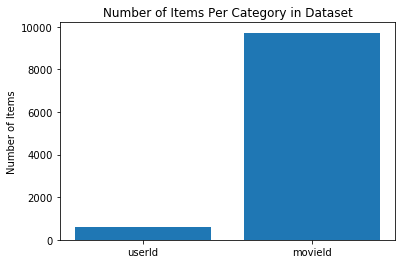

In [11]:
plt.bar(items.keys(), items.values(), color= 'tab:blue');
plt.title("Number of Items Per Category in Dataset", color= "black");
plt.xticks(color= 'black')
plt.ylabel('Number of Items', color= 'black')

I looked at the number of movie ratings for each rating category in this subset of the data.

In [8]:
ratings= df['rating'].value_counts()
ratings

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In order to look at the spread of ratings in the dataset for my analyses in this project, I created a graph showing how many ratings were in my dataset and how each movie was rated accordingly within the dataset:

In [9]:
ratings_sorted= dict(zip(ratings.index, ratings))

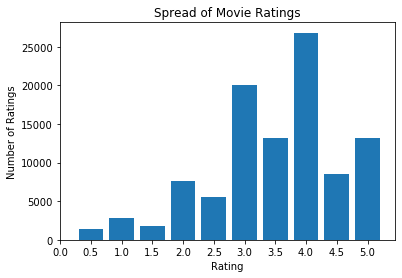

In [10]:
plt.bar(ratings_sorted.keys(), ratings_sorted.values(), width= 0.4)
plt.xticks(np.arange(0, 5.1, step= 0.5))
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Spread of Movie Ratings')
plt.show()

The most common movie rating was a '4' rating. However, I opted to look at the most highly rated movies (a '5' rated movie) when making most movie recommendations.

The code below reads in the second smaller subset of data in the dataset which includes names and genres of the movies in the data.

In [11]:
movies=pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


There are three features in this subset of data and 9742 represented movies.

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
movies.shape

(9742, 3)

I merged the two subsets of data in the dataset into one complete dataset using the movieId column for simpler manipulation.

In [14]:
movie_data=pd.merge(df, movies, on= 'movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


I looked at the number of rated movies by each individual person in the whole dataset in the next code.

In [15]:
rating_count= movie_data.groupby('userId')['rating'].count()
rating_count

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

I constructed a graph of the number of rated movies for each unique user in the dataset:

In [16]:
already_rated= dict(zip(rating_count.index, rating_count))

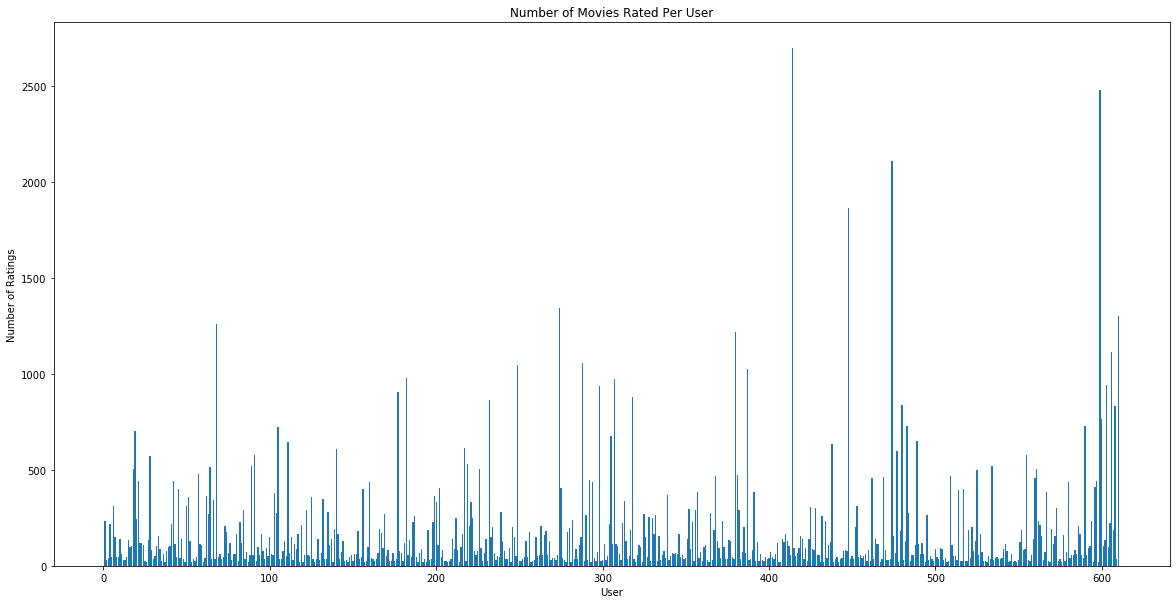

In [17]:
plt.figure(figsize=(20,10))
plt.bar(already_rated.keys(), already_rated.values())
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.title('Number of Movies Rated Per User')
plt.show()

There were explicit ratings from my dataset. The most number of ratings a single user provided was over 2500, which provides a lot of information for assembling recommendations. Some users only provided a couple of ratings so a filling of missing values occurred in some of my recommedation systems creations to get more similarity information to provide predicted recommendations for some users.

I sorted the rated movies from highest rated to lowest rated to help envision some highly rated movies.

In [18]:
movie_data['rating'].sort_values(ascending=False)

9802      5.0
31580     5.0
31617     5.0
13469     5.0
71101     5.0
         ... 
18311     0.5
91521     0.5
86341     0.5
100117    0.5
22891     0.5
Name: rating, Length: 100836, dtype: float64

In [19]:
movie_data.shape

(100836, 6)

Some of the highest rated movies in the dataset include "Men in Black" and "Speed".

In [20]:
movie_data['title'][9802]

'Men in Black (a.k.a. MIB) (1997)'

In [21]:
movie_data['title'][31580]

'Speed (1994)'

I located all the movies in the dataset that were given a rating of a "5" and which user gave out that specific rating.

In [135]:
movie_data.loc[movie_data['rating']==5]

,userId,movieId,rating,timestamp,title,genres
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,40,1,5.0,832058959,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
13,43,1,5.0,848993983,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
16,46,1,5.0,834787906,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
19,57,1,5.0,965796031,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100761,610,96832,5.0,1479545188,Holy Motors (2012),Drama|Fantasy|Musical|Mystery|Sci-Fi
100773,610,100906,5.0,1479542714,Maniac Cop 2 (1990),Action|Horror|Thriller
100787,610,107771,5.0,1479544448,Only Lovers Left Alive (2013),Drama|Horror|Romance
100802,610,115727,5.0,1479544153,Crippled Avengers (Can que) (Return of the 5 D...,Action|Adventure


I located user 43 because that is my example user to create recommendations for in my project. User 43 rated the movie, "Toy Story" with a '5'. That is the movie I want to get similar recommendations for in my project.

In [23]:
movie_data.loc[movie_data['userId']==43]

,userId,movieId,rating,timestamp,title,genres
13,43,1,5.0,848993983,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
220,43,3,5.0,848994405,Grumpier Old Men (1995),Comedy|Romance
385,43,47,4.0,848993793,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
869,43,110,3.0,848993747,Braveheart (1995),Action|Drama|War
1376,43,231,3.0,848993694,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
...,...,...,...,...,...,...
77344,43,259,4.0,848994678,Kiss of Death (1995),Crime|Drama|Thriller
77349,43,484,5.0,848995032,Lassie (1994),Adventure|Children
77351,43,519,5.0,848994479,RoboCop 3 (1993),Action|Crime|Drama|Sci-Fi|Thriller
77372,43,828,5.0,848995086,"Adventures of Pinocchio, The (1996)",Adventure|Children


## Data Modeling

After trying different models and code, I chose to go with three different paths to retrieving top 5 movie recommendations. The best model for attaining top 5 movie recommendations was the SVD model.

For my recommendation system methods I decided to find recommendations for user 43 in the dataset who watched the movie, "Toy Story," and rated the movie a '5'. This was a highly rated film and I wanted to find similar such films through recommendation systems.

### Recommendation System 1: SVD

The next cells instantiate the SVD model using surprise libraries. The data was read into surprise libraries and a train test split was performed.

In [25]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [26]:
data= df[['userId', 'movieId', 'rating']]
reader= Reader(line_format= 'user item rating', sep= ',')
data= Dataset.load_from_df(data, reader=reader)

In [27]:
trainset, testset= train_test_split(data)

In [28]:
svd= SVD()

In [29]:
svd.fit(trainset)

The model had a solid root mean squared error(RMSE) of .8724.

In [30]:
predictions= svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8724


0.8724104779198343

The top ten predictions from the test set are listed below where SVD tries to match the estimated score to the initial rating for the film by each user.

In [32]:
predictions[:10]

[Prediction(uid=560, iid=3825, r_ui=2.5, est=2.9447150155697277, details={'was_impossible': False}),
 Prediction(uid=414, iid=5951, r_ui=2.5, est=3.423451868044626, details={'was_impossible': False}),
 Prediction(uid=1, iid=1060, r_ui=4.0, est=4.351451536386521, details={'was_impossible': False}),
 Prediction(uid=480, iid=7161, r_ui=0.5, est=2.5622523185630137, details={'was_impossible': False}),
 Prediction(uid=361, iid=420, r_ui=3.5, est=2.789245735346649, details={'was_impossible': False}),
 Prediction(uid=509, iid=89678, r_ui=4.0, est=3.180745027793939, details={'was_impossible': False}),
 Prediction(uid=249, iid=84942, r_ui=3.5, est=3.6762468833474884, details={'was_impossible': False}),
 Prediction(uid=555, iid=3105, r_ui=4.0, est=3.472288261479017, details={'was_impossible': False}),
 Prediction(uid=57, iid=2997, r_ui=4.0, est=4.17428963589261, details={'was_impossible': False}),
 Prediction(uid=165, iid=5505, r_ui=3.0, est=3.200522698473336, details={'was_impossible': False})]

The following code takes in a user and an item and gives an estimated rating for how that user might rate that item in a recommendation system. The first set of code is a confirmation of user 43 who watched "Toy Story" with an estimated rating of a '5'.

In [33]:
user=43
item= 1
svd.predict(user, item)

Prediction(uid=43, iid=1, r_ui=None, est=5, details={'was_impossible': False})

I located the movie, "Toy Story", in my dataset subset.

In [38]:
movies.loc[movies['movieId']== 1]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


The next cells are item recommendations for user 43 using the SVD model. They are highly rated movies.

In [447]:
user=43
item= 362
svd.predict(user, item)

Prediction(uid=43, iid=362, r_ui=None, est=4.778635988966866, details={'was_impossible': False})

In [446]:
movies.loc[movies['movieId']== 362]

,movieId,title,genres
320,362,"Jungle Book, The (1994)",Adventure|Children|Romance


In [41]:
user=43
item= 500
svd.predict(user, item)

Prediction(uid=43, iid=500, r_ui=None, est=4.843212956090433, details={'was_impossible': False})

In [42]:
movies.loc[movies['movieId']== 500]

,movieId,title,genres
436,500,Mrs. Doubtfire (1993),Comedy|Drama


In [439]:
user=43
item= 356
svd.predict(user, item)

Prediction(uid=43, iid=356, r_ui=None, est=5, details={'was_impossible': False})

In [438]:
movies.loc[movies['movieId']== 356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [337]:
user=43
item= 260
svd.predict(user, item)

Prediction(uid=43, iid=260, r_ui=None, est=5, details={'was_impossible': False})

In [336]:
movies.loc[movies['movieId']== 260]

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [215]:
user=43
item= 150
svd.predict(user, item)

Prediction(uid=43, iid=150, r_ui=None, est=4.937486290309515, details={'was_impossible': False})

In [214]:
movies.loc[movies['movieId']== 150]

,movieId,title,genres
123,150,Apollo 13 (1995),Adventure|Drama|IMAX


The SVD model is the best of the models I created with predicted values not far off from actual true values. SVD can deal with a cold start because it provides accurate estimated ratings for unwatched movies. The SVD model had the lowest RMSE of my models. Predictions can be made for any movie in the dataset for user 43 or for any other user. The recommendations provided were highly rated movies. Most movies recommended were released around the same year "Toy Story" was released.

### Recommendation System 2 : KNN

I instantiated a KNN model with a user-based option to find users similar to user 43 who watched the movie, "Toy Story," and rated the movie a '5'.

In [295]:
from surprise import KNNBasic

In [296]:
KNN_model= KNNBasic(sim_options={'user_based': True}).fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


I looked at five cross validation folds for my KNN model revealing a root mean squared error(RMSE) averaging .9467. This was higher than my SVD model score.

In [297]:
cross_validate(KNN_model, data, verbose= True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9510  0.9480  0.9439  0.9447  0.9461  0.9467  0.0025  
MAE (testset)     0.7278  0.7265  0.7232  0.7268  0.7252  0.7259  0.0016  
Fit time          0.14    0.16    0.16    0.16    0.16    0.16    0.01    
Test time         1.01    1.18    1.05    1.02    1.05    1.06    0.06    


{'test_rmse': array([0.95100519, 0.94798319, 0.94391183, 0.94468019, 0.94606466]),
 'test_mae': array([0.72777025, 0.72647637, 0.72320837, 0.72681736, 0.72517274]),
 'fit_time': (0.136000394821167,
  0.1619577407836914,
  0.16296648979187012,
  0.15599393844604492,
  0.15899944305419922),
 'test_time': (1.0070018768310547,
  1.1770336627960205,
  1.0530309677124023,
  1.0190062522888184,
  1.0499680042266846)}

I found the 5 closest users to user 43 and the movies that were recommended from these users as similar to the movie, "Toy Story." Most of the movie recommendations from this system were movies released around the same year as "Toy Story" that had high ratings.

In [ ]:
user=43
item= 1

In [298]:
KNN_model.get_neighbors(iid=item, k=5)

[48, 552, 542, 12, 276]

In [299]:
movie_data.loc[movie_data['userId']==48].head()

,userId,movieId,rating,timestamp,title,genres
5356,48,780,3.5,1127128851,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
9706,48,1580,5.0,1127128859,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
10004,48,1625,4.5,1127128739,"Game, The (1997)",Drama|Mystery|Thriller
11302,48,2115,5.0,1127128639,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy
12013,48,2353,3.0,1127128708,Enemy of the State (1998),Action|Thriller


In [300]:
movie_data.loc[movie_data['userId']==552].head()

,userId,movieId,rating,timestamp,title,genres
260,552,3,1.0,1111472953,Grumpier Old Men (1995),Comedy|Romance
1558,552,235,4.0,1111472950,Ed Wood (1994),Comedy|Drama
2091,552,296,4.0,1111473067,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2715,552,356,4.0,1111473075,Forrest Gump (1994),Comedy|Drama|Romance|War
3763,552,527,4.0,1112151215,Schindler's List (1993),Drama|War


In [301]:
movie_data.loc[movie_data['userId']==542].head()

,userId,movieId,rating,timestamp,title,genres
552,542,47,5.0,1163386913,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
2089,542,296,3.5,1163386827,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2710,542,356,5.0,1163386930,Forrest Gump (1994),Comedy|Drama|Romance|War
3551,542,500,3.5,1163387264,Mrs. Doubtfire (1993),Comedy|Drama
4639,542,596,4.5,1163386606,Pinocchio (1940),Animation|Children|Fantasy|Musical


In [302]:
movie_data.loc[movie_data['userId']==12].head()

,userId,movieId,rating,timestamp,title,genres
3792,12,543,3.5,1247263318,So I Married an Axe Murderer (1993),Comedy|Romance|Thriller
8584,12,1265,3.5,1247264118,Groundhog Day (1993),Comedy|Fantasy|Romance
19306,12,222,5.0,1247263465,Circle of Friends (1995),Drama|Romance
19528,12,357,3.5,1247264106,Four Weddings and a Funeral (1994),Comedy|Romance
20776,12,920,4.5,1247264114,Gone with the Wind (1939),Drama|Romance|War


In [303]:
movie_data.loc[movie_data['userId']==276].head()

,userId,movieId,rating,timestamp,title,genres
100,276,1,4.0,858350384,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1422,276,231,4.0,858351184,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
1682,276,260,5.0,858350672,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
2290,276,333,5.0,858351214,Tommy Boy (1995),Comedy
2571,276,356,5.0,858351182,Forrest Gump (1994),Comedy|Drama|Romance|War


### Recommendation System 3: Function-Based

After finishing my first recommendation system, I created a third recommendation system using a function-based method with a Euclidean distance metric to calculate user similarities

The user_ratings dataframe rotates the movieId column to a row and includes all the ratings from users on movies in the dataset.

In [40]:
user_ratings = df.pivot(index='userId', columns='movieId', values='rating')
user_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I filled in all the null value columns with the mean value for each column to provide basic ratings for all users on all movies.

In [41]:
for col in user_ratings:
    mean = user_ratings[col].mean()
    user_ratings[col] = user_ratings[col].fillna(value=mean)
user_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.00000,3.431818,4.000000,2.357143,3.071429,4.000000,3.185185,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
2,3.92093,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
3,3.92093,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
4,3.92093,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
5,4.00000,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


I calculated the euclidean distance for two users with an item to see their similarity distance.

In [42]:
u1 = user_ratings.iloc[1]
u2 = user_ratings.iloc[2]
def distance(v1,v2):
    '''Returns euclidean distance between two values'''
    return np.sqrt(np.sum((v1-v2)**2))
distance(u1,u2)

14.6240105350213

I created a dataframe that took in the similary rating distance between two users for all users on all items in the dataset.

In [43]:
user_matrix = []
for i, row in enumerate(user_ratings.index):
    '''Calculates the similarity rating distances between two users.
    u1: 
        rating for user 1
    u2: 
        rating for user 2
    Returns: 
        similarity distances between two users
    '''
    u1 = user_ratings.iloc[i]
    user_distances = [entry[i] for entry in user_matrix] 
    for j, row2 in enumerate(user_ratings.index[i:]):
        u2 = user_ratings.iloc[j]
        d = distance(u1,u2)
        user_distances.append(d)
    user_matrix.append(user_distances)
user_similarities = pd.DataFrame(user_matrix)

In [44]:
user_similarities.head()

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.000000,16.989320,22.213995,24.351695,17.46949,22.135074,21.936764,17.423789,17.299122,22.290009,...,17.546982,19.660812,35.091126,18.537302,20.339939,25.228110,21.177022,32.501575,16.865820,27.115982
1,16.989320,16.989320,0.000000,14.624011,18.44075,6.789201,15.406643,14.706245,7.214758,6.795916,...,28.937392,7.665474,11.387603,29.941885,8.985898,11.496734,19.070503,14.427590,26.766173,4.907791
2,22.213995,0.000000,22.213995,14.624011,0.00000,22.964383,15.461842,20.324230,20.008624,15.469710,...,41.071666,31.578054,15.823685,17.750610,32.509412,16.243882,17.747057,24.051159,19.746626,29.904999
3,24.351695,14.624011,14.624011,24.351695,18.44075,22.964383,0.000000,19.221903,23.147269,22.088185,...,19.503345,42.827732,33.616709,19.525093,20.315157,34.904524,19.726633,20.614389,26.224825,22.527793
4,17.469490,18.440750,0.000000,18.440750,17.46949,6.789201,15.461842,19.221903,0.000000,15.998280,...,20.802612,9.876731,39.218073,29.115338,8.709706,12.472668,30.167581,10.146750,12.604886,19.602970


I created a recommend_movies function to act as a recommendation system to recommend 5 movies to a user using collaborative user-based filtering. The function took out movies that were already watched by a user to increase the chance of unique movie recommendations. The function sorted the movies to only mostly recommend movies rated a '5' to keep with the theme of recommending only highly rated movies.

In [45]:
def recommend_movies(user, user_similarities, user_ratings, df, n_users=20, n_items=5):
    """
    Recommends movies for n number of items. 
    n is the number of similar users who you wish to use to generate recommendations.
    The similar users are offset by 1 to omit most similar user of oneself.
    already_watched: 
        movies already watched by the user
    unwatched: 
        movies not yet watched by the user
    projected_user_reviews: 
        ratings of top n users 
    Returns: 
        top five movie recommendations and ratings for a movie watcher 
    """
    top_n_similar_users = user_similarities[user-1].drop(user-1).sort_values().index[:n_users] 
    top_n_similar_users = [i+1 for i in top_n_similar_users] 
    already_watched = set(df[df.userId == 0].movieId.unique())
    unwatched = set(df.movieId.unique()) - already_watched
    projected_user_reviews = user_ratings[user_ratings.index.isin(top_n_similar_users)].mean()[list(unwatched)].sort_values(ascending=False)
    return projected_user_reviews[:n_items]

In [46]:
recommend_movies(43, user_similarities, user_ratings, df)

movieId
158027    5.0
7096      5.0
95311     5.0
3531      5.0
96935     5.0
dtype: float64

In [47]:
movies.loc[movies['movieId']== 158027]

,movieId,title,genres
9284,158027,SORI: Voice from the Heart (2016),Drama|Sci-Fi


In [48]:
movies.loc[movies['movieId']== 7096]

,movieId,title,genres
4768,7096,Rivers and Tides (2001),Documentary


In [49]:
movies.loc[movies['movieId']== 95311]

,movieId,title,genres
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy


In [50]:
movies.loc[movies['movieId']== 3531]

,movieId,title,genres
2639,3531,All the Vermeers in New York (1990),Comedy|Drama|Romance


In [51]:
movies.loc[movies['movieId']== 96935]

,movieId,title,genres
7993,96935,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...,Comedy|Fantasy|Romance


## The Cold Start Problem

My recommendation systems did well, but how is a common problem known as the cold start problem addressed? The cold start problem occurs where a new user is introduced to the dataset that has not provided a substantial amount of information to make recommendations. The SVD model was included to address the cold start problem. SVD involves the creation of a sparse matrix where user ratings for movies can be inferred based off of a few provided ratings or small amount of information from a new user in relation to already provided user information. The new user can be asked to provide a small amount of information about possible interests and a new user can be categorized in accordance with similar user preferences to determine what the new user might like. Also, what is popular or trending can be a recommendation created for a new user. My models mainly recommended highly rated movies around the same year that "Toy Story" was released, so what was popular in the year "Toy Story" was released was usually recommended to deal with the cold start problem. For the function-based recommendation system unrated movies were filled in with the mean rating for each column in the user ratings dataframe. A collaborative filtering user-based method was instilled. Movies that were already watched were left out of recommendations for a user. Movies that were recommended to users and considered popular were movies that were estimated to be highly rated by users.

## Conclusions

- The best recommendation system employed SVD.

- Five similar movie recommendations for user 43 who watched "Toy Story" and rated it a '5' from the SVD model were:  

Apollo 13 (1995)/4.9,
Forrest Gump (1994)/5.0,
Star Wars: Episode IV - A New Hope (1977)/5.0,
The Jungle Book (1994)/4.8,
and Mrs. Doubtfire (1993)/4.8

## Recommendations for Further Analysis

- Change the distance metric and parameters for my function-based recommendation system


- Deploy a recommendation system for use to new users